## Bienvenidos a la Semana 4, Día 4

¡Este es el comienzo de un proyecto INCREÍBLE! Muy sencillo y muy efectivo.

### Primero - un aviso para usuarios de Windows PC
 
Al ejecutar este notebook, podrías encontrarte con un problema en el navegador Playwright que lanza un error NotImplementedError.
 
Esto debería funcionar cuando pasemos a módulos de Python, pero puede causar problemas en Windows dentro de un notebook.

Si te aparece este error y quieres ejecutar el notebook, necesitas hacer un pequeño cambio que parece un poco "hacky":

1. Haz clic derecho en `.venv` en el Explorador de Archivos a la izquierda y selecciona "Buscar en la carpeta"
2. Busca `asyncio.set_event_loop_policy(WindowsSelectorEventLoopPolicy())`
3. Ese código debería encontrarse en una línea dentro de un archivo llamado `kernelapp.py`
4. Comenta esa línea de código en ese archivo y guarda los cambios.
5. Reinicia el kernel presionando el botón "Restart" arriba.

¡Gracias al estudiante Nicolás por encontrar esto, y a Yaki, Zibin y Bhaskar por confirmar que les funcionó!

In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.prebuilt import ToolNode, tools_condition
import requests
import os
from langchain.agents import Tool

from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import MemorySaver

In [2]:
load_dotenv(override=True)

True

### LangGraph Asíncrono

Para ejecutar una herramienta:  
- Sincrónico: `tool.run(inputs)`  
- Asíncrono: `await tool.arun(inputs)`

Para invocar el grafo:  
- Sincrónico: `graph.invoke(state)`  
- Asíncrono: `await graph.ainvoke(state)`

In [ ]:
class State(TypedDict):

    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [4]:
pushover_token = os.getenv("PUSHOVER_TOKEN")
pushover_user = os.getenv("PUSHOVER_USER")
pushover_url = "https://api.pushover.net/1/messages.json"

def push(text: str):
    """Send a push notification to the user"""
    requests.post(pushover_url, data = {"token": pushover_token, "user": pushover_user, "message": text})

tool_push = Tool(
        name="send_push_notification",
        func=push,
        description="Útil cuando quieres mandar una notificación push"
    )

### Siguiente: Instalar Playwright

En Windows y MacOS:  
`playwright install`

En Linux:  
`playwright install —with-reps chromium`

In [10]:
!playwright install

125.8 MiB [                    ] 0% 0.0s125.8 MiB [                    ] 0% 72.7s125.8 MiB [                    ] 0% 50.4s125.8 MiB [                    ] 0% 53.6s125.8 MiB [                    ] 0% 33.9s125.8 MiB [                    ] 0% 34.3s125.8 MiB [                    ] 0% 22.7s125.8 MiB [                    ] 0% 19.2s125.8 MiB [                    ] 0% 14.2s125.8 MiB [                    ] 1% 10.9s125.8 MiB [                    ] 2% 8.2s125.8 MiB [=                   ] 2% 6.8s125.8 MiB [=                   ] 3% 5.2s125.8 MiB [=                   ] 4% 6.2s125.8 MiB [=                   ] 6% 4.2s125.8 MiB [=                   ] 7% 3.8s125.8 MiB [==                  ] 8% 3.6s125.8 MiB [==                  ] 8% 3.9s125.8 MiB [==                  ] 9% 3.5s125.8 MiB [==                  ] 10% 3.3s125.8 MiB [==                  ] 11% 3.2s125.8 MiB [===                 ] 12% 3.1s125.8 MiB [===                 ] 14% 2.7s125.8 MiB [===                 ] 15% 2.6s125.8 MiB [===            

### Introducción a nest_asyncio

El código asíncrono en Python solo permite un "event loop" (bucle de eventos) procesando eventos asíncronos.

La librería `nest_asyncio` soluciona esto y se utiliza en situaciones especiales, cuando necesitas ejecutar un bucle de eventos anidado.


In [5]:
import nest_asyncio
nest_asyncio.apply()

### La comunidad de LangChain

Una de las cosas más destacables de LangChain es la rica comunidad que lo rodea.

Mira esto:


In [11]:
from langchain_community.agent_toolkits import PlayWrightBrowserToolkit
from langchain_community.tools.playwright.utils import create_async_playwright_browser

async_browser =  create_async_playwright_browser(headless=False)  # headful mode
toolkit = PlayWrightBrowserToolkit.from_browser(async_browser=async_browser)
tools = toolkit.get_tools()

In [12]:
for tool in tools:
    print(f"{tool.name}={tool}")

click_element=async_browser=<Browser type=<BrowserType name=chromium executable_path=/Users/juangabriel/Library/Caches/ms-playwright/chromium-1169/chrome-mac/Chromium.app/Contents/MacOS/Chromium> version=136.0.7103.25>
navigate_browser=async_browser=<Browser type=<BrowserType name=chromium executable_path=/Users/juangabriel/Library/Caches/ms-playwright/chromium-1169/chrome-mac/Chromium.app/Contents/MacOS/Chromium> version=136.0.7103.25>
previous_webpage=async_browser=<Browser type=<BrowserType name=chromium executable_path=/Users/juangabriel/Library/Caches/ms-playwright/chromium-1169/chrome-mac/Chromium.app/Contents/MacOS/Chromium> version=136.0.7103.25>
extract_text=async_browser=<Browser type=<BrowserType name=chromium executable_path=/Users/juangabriel/Library/Caches/ms-playwright/chromium-1169/chrome-mac/Chromium.app/Contents/MacOS/Chromium> version=136.0.7103.25>
extract_hyperlinks=async_browser=<Browser type=<BrowserType name=chromium executable_path=/Users/juangabriel/Library/Ca

In [ ]:
tool_dict = {tool.name:tool for tool in tools}

navigate_tool = tool_dict.get("navigate_browser")
extract_text_tool = tool_dict.get("extract_text")

await navigate_tool.arun({"url": "https://www.cnn.com"})
text = await extract_text_tool.arun({})

TargetClosedError: Browser.new_context: Target page, context or browser has been closed

In [14]:
import textwrap
print(textwrap.fill(text))

Breaking News, Latest News and Videos | CNN CNN values your feedback
1. How relevant is this ad to you? 2. Did you encounter any technical
issues? Video player was slow to load content Video content never
loaded Ad froze or did not finish loading Video content did not start
after ad Audio on ad was too loud Other issues Ad never loaded Ad
prevented/slowed the page from loading Content moved around while ad
loaded Ad was repetitive to ads I've seen previously Other issues
Cancel Submit Thank You! Your effort and contribution in providing
this feedback is much
appreciated. Close Ad Feedback Close icon US World Politics Business
Health Entertainment Style Travel Sports Science Climate Weather
Ukraine-Russia War Israel-Hamas War Games More US World Politics
Business Health Entertainment Style Travel Sports Science Climate
Weather Ukraine-Russia War Israel-Hamas War Games Watch Listen Live TV
Subscribe Sign in My Account Settings Newsletters Topics you follow
Sign out Your CNN account Sign 

In [15]:
all_tools = tools + [tool_push]

In [ ]:
llm = ChatOpenAI(model="gpt-4o-mini")
llm_with_tools = llm.bind_tools(all_tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

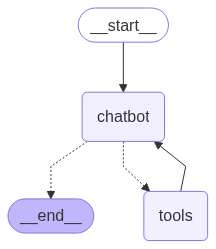

In [ ]:
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=all_tools))
graph_builder.add_conditional_edges( "chatbot", tools_condition, "tools")
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START, "chatbot")

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
config = {"configurable": {"thread_id": "10"}}

async def chat(user_input: str, history):
    result = await graph.ainvoke({"messages": [{"role": "user", "content": user_input}]}, config=config)
    return result["messages"][-1].content

gr.ChatInterface(chat, type="messages").launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
